In [1]:
import spacy

In [2]:
import re
import pandas as pd
import tensorflow
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
import string
import seaborn
import nltk
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import scipy
import scipy.sparse as spa
import scipy as sp
import sklearn.preprocessing, sklearn.decomposition, \
      sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn_pandas import DataFrameMapper, cross_val_score

In [3]:
train = pd.read_csv('Documents/ds/hackathon/train_F3WbcTw.csv')
train.head()

In [4]:
test=pd.read_csv('Documents/ds/hackathon/test_tOlRoBf.csv')

# Upsampling the dataset as the dataset was skewed 

In [6]:
count_2,count_1,count_0=train.sentiment.value_counts()

In [ ]:
data_class_0=pd.DataFrame(train[train['sentiment']==0])
data_class_1=pd.DataFrame(train[train['sentiment']==1])
data_class_2=pd.DataFrame(train[train['sentiment']==2])

In [13]:
data_class_2_1=data_class_2.sample(count_1)

In [14]:
data_class_2_2=data_class_2.sample(count_1)

In [15]:
data_class_2_3=data_class_2.sample(count_1)

In [16]:
data_class_2_4=data_class_2.sample(count_1)
data_class_2_5=data_class_2.sample(count_1)

In [17]:
data_1=pd.concat([data_class_0,data_class_1,data_class_2_1], axis=0)
data_2=pd.concat([data_class_0,data_class_1,data_class_2_2], axis=0)

In [18]:
data_3=pd.concat([data_class_0,data_class_1,data_class_2_3], axis=0)
data_4=pd.concat([data_class_0,data_class_1,data_class_2_4], axis=0)

In [19]:
data_5=pd.concat([data_class_0,data_class_1,data_class_2_5], axis=0)

In [20]:
data_t=pd.concat([data_1,data_2,data_3,data_4,data_5],axis=0)

In [22]:
combined_data=data_t.append(test,ignore_index=True)
stop_words = set(stopwords.words('english')) 

C:\Users\lenovo\Anaconda3\envs\tensorflow_gpu\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


# Data preprocessing

In [89]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 


In [24]:

combined_data['tidy_text']=combined_data['text'].str.replace("[^a-zA-Z#]", " ").str.lower()

from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
tokenized = combined_data['tidy_text'].apply(lambda x: x.split())
tokenized.head()

tokenized= tokenized.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized.head()
for i in range(len(tokenized)):
    tokenized[i] = [w for w in tokenized[i] if (len(w)>3 and w not in stop_words)]



In [31]:
#### REMOVING FEW HUGE SENTENCES
tokenized[g]=[]

In [32]:
MAX_SEQ_LENGHT=0
g=0
for i in range(len(tokenized)):
  a=len(tokenized[i])
  if a>MAX_SEQ_LENGHT:
    MAX_SEQ_LENGHT=a
    g=i
MAX_SEQ_LENGHT,g,len(tokenized[0]) 

(7390, 12428, 56)

In [33]:

for i in range(len(tokenized)):
     tokenized[i] = ' '.join(tokenized[i])
combined_data['tidy_text'] = tokenized
combined_data['tidy_text1']=tokenized
combined_data.head()

,drug,sentiment,text,unique_hash,tidy_text,tidy_text1
0,humira,0.0,Reply posted for JessZidek. Hi Jess Sorry to r...,be5a13376933a7f9bbf8e801c31691092f63260a,reply posted jesszidek jess sorry read challen...,reply posted jesszidek jess sorry read challen...
1,ocrelizumab,0.0,"Last Updated: January 01, 2017. Share | Comme...",e8f39b50683bb1b94689e8e462bdcd1aff331ee1,last updated january share comment tell friend...,last updated january share comment tell friend...
2,fingolimod,0.0,Hi I was on rebif for about a year – rotate yo...,c2df2a0e70805bb1a17305e2ac137aeae26d424a,rebif year rotate injection site remember take...,rebif year rotate injection site remember take...
3,tecentriq,0.0,No problem. I know how hard and lonely this jo...,603c2f1612eeabcaac016b6da0df4117b6a8ccd8,problem know hard lonely journey happy help do...,problem know hard lonely journey happy help do...
4,dexamethasone implant,0.0,Conclusion: These real-life results suggest th...,918b3d83f17c334962f30974f2ff1f16630eebf0,conclusion real life result suggest intravitre...,conclusion real life result suggest intravitre...


In [34]:
combined_data.shape

(14379, 6)

# Dependency Parsing Using SpaCy

In [35]:
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

nlp = spacy.load('en_core_web_sm')
main=[]
for i in range(combined_data.shape[0]):
    da=[]
    doc=nlp((combined_data['tidy_text'][i]))
    for token in doc:
        if token.text==combined_data['drug'][i]:
            a=token.head
            b=a.head
            da.append(token.text)
            if a.pos_=='ADJ'or a.pos_=='VERB'or a.pos_=='NOUN':
                da.append(a.text)
            for w in a.children:
                if w.text != token.text:
                    if w.pos_ == 'ADJ' or w.pos_=='VERB'or w.pos_=='NOUN':
                        da.append(w.text)
            if b.pos_=='ADJ' or b.pos_=='VERB'or b.pos_=='NOUN':
                da.append(b.text)
            for y in b.children:
                if y.text != token.text:
                    if y.pos_ == 'ADJ' or y.pos_=='VERB' or y.pos_=='NOUN':
                        da.append(y.text)    
            da=Remove(da)
    main.append(da)

In [38]:
fea_dependency_data=main

In [40]:
for i in range(len(main)):
     fea_dependency_data[i] = ' '.join(fea_dependency_data[i])
combined_data['fea_dependency']=fea_dependency_data

'humira biologics scared inducing symptom maintain'

# Feature Extraction using TfIdf and CountVect

In [41]:

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=1, max_features=2000, stop_words='english')
tfidf_vectorizer1 = TfidfVectorizer(max_df=0.90, min_df=1,max_features=3000, stop_words='english')

from sklearn.feature_extraction.text import CountVectorizer
count_vec1 = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=4000)
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=1000)

In [86]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    norm='l2',
    min_df=0,
    smooth_idf=False,
    max_features=24000)

In [88]:
mapper = DataFrameMapper([
        ('tidy_text',char_vectorizer),('tidy_text1',tfidf_vectorizer),
        ('fea_dependency',tfidf_vectorizer1),
        ('drug', label_encoder)])
data=mapper.fit_transform(combined_data)



In [78]:

for i in range(data.shape[0]):
    data[i][-1]/=101
train_data=data[:data_t.shape[0]]
test_data=data[data_t.shape[0]:]

(14379, 27001)

# Training

In [80]:
x_train,x_valid,y_train,y_valid=train_test_split(train_data,data_t['sentiment'],random_state=4,test_size=0.3)

In [81]:
lreg=LogisticRegression(random_state=1, solver='lbfgs',multi_class='multinomial',max_iter=1000,verbose=1)
lreg.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [82]:
prediction=lreg.predict_proba(x_train.tolist())
prediction
predic_tr=np.argmax(prediction,1)
f1_score(y_train, predic_tr,average='macro')

0.980169618358693

In [83]:
prediction_va=lreg.predict_proba(x_valid.tolist())
predic_va=np.argmax(prediction_va,1)

f1_score(y_valid, predic_va,average='macro')

0.9164969450101833

In [84]:
prediction_test=lreg.predict_proba(test_data.tolist())

In [85]:
predic=np.argmax(prediction_test,1)
test['sentiment']=predic
test.head()

submission = test[['unique_hash','sentiment']]
submission.to_csv('sub_new_lreg_count_vec2.csv', index=False)

# Data Visualisation

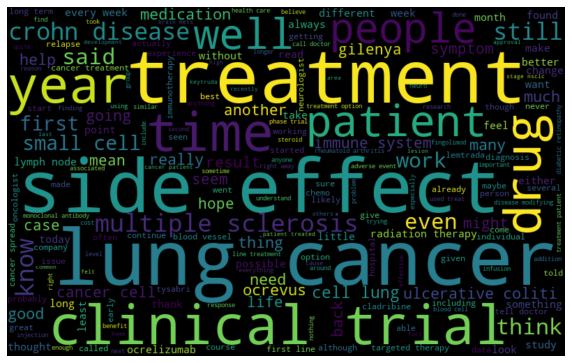

In [42]:
all_words = ' '.join([text for text in combined_data['tidy_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

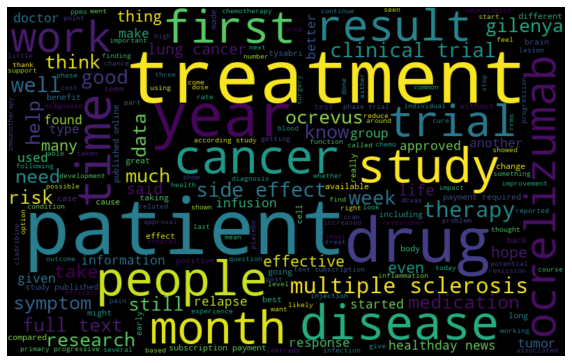

In [43]:
normal_words =' '.join([text for text in combined_data['tidy_text'][combined_data['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

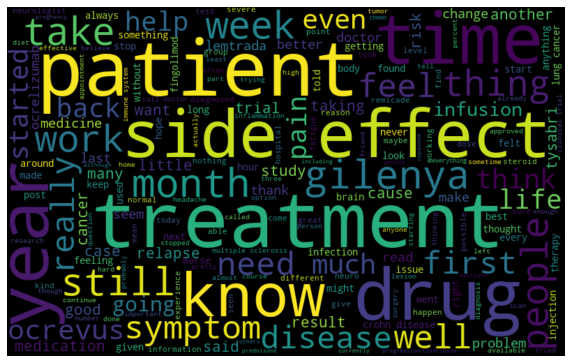

In [44]:

normal_words =' '.join([text for text in combined_data['tidy_text'][combined_data['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()




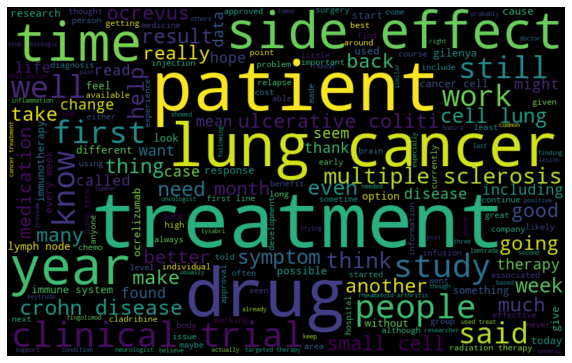

In [46]:
normal_words =' '.join([text for text in combined_data['tidy_text'][combined_data['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
train['text'].shape[0]

5279

In [61]:
po=0
ne=0
for i in range(5279):
    if train['sentiment'][i]==1:
        ne+=1
    if train['sentiment'][i]==0:
        po+=1

In [62]:
po,ne

(617, 837)